In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('patient_data.csv')
#dataチェック
data



,patient_name,12-00023,12-00051,12-00066,12-00211,12-00258,12-00294,12-00372,12-00426,13-00007,...,16-01210,16-01216,16-01219,16-01223,16-01225,16-01227,16-01237,16-01254,16-01262,16-01272
0,Survive,397.000000,707.000000,311.000000,1396.000000,147.000000,3.000000,1735.000000,1655.000000,595.000000,...,395.000000,395.000000,317.000000,31.000000,316.000000,399.000000,122.000000,303.000000,28.000000,80.000000
1,TSPAN6,0.220678,1.659656,0.070215,0.000000,0.000000,0.000000,0.921085,0.198171,0.055838,...,0.127426,0.648789,0.085224,1.024195,0.367642,0.395749,0.249059,0.069569,0.142059,0.451810
2,DPM1,29.791548,29.363142,23.311415,25.117470,29.351673,31.240770,22.940781,21.006074,29.063524,...,29.588330,34.238344,28.607021,30.376699,35.976402,25.101824,38.785308,25.717446,33.703438,25.928877
3,SCYL3,19.336921,18.734961,10.532266,37.659392,15.647852,39.189992,33.734750,35.812243,19.654871,...,30.021579,13.477109,20.823184,21.065833,23.765434,17.950065,7.245358,21.496909,16.461058,8.734994
4,C1orf112,6.868607,2.617150,11.129094,12.541923,8.190423,18.875313,11.110592,9.229084,20.185329,...,9.760836,5.721136,16.874449,6.494329,16.465113,6.105849,4.845333,10.551342,8.647826,8.785195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22839,RP11-196O16.1,0.220678,0.159582,0.315968,0.975109,0.350563,0.032713,1.151357,0.509581,0.446702,...,0.305823,0.206433,1.420408,2.700151,1.286747,0.339214,0.679252,0.440605,0.443934,0.351408
22840,RP4-671G15.2,0.027585,0.031916,0.105323,0.067249,0.063739,0.228990,0.172703,0.113240,0.055838,...,0.127426,0.029490,0.170449,0.139663,0.393902,0.028268,0.045283,0.069569,0.124301,0.100402
22841,RP11-731C17.2,1.103391,0.255332,1.298979,2.622708,0.956081,4.710650,3.943397,4.557922,2.373102,...,4.689279,3.951712,6.960000,2.932923,3.571380,4.324976,2.467950,1.182678,2.077609,0.652615
22842,RP4-621B10.8,0.165509,0.000000,0.035108,0.369869,0.382432,0.817821,0.287839,0.254791,0.027919,...,0.280337,0.029490,0.028408,0.093109,0.315122,0.028268,0.045283,0.556554,0.248603,0.075302


In [7]:
#データー形を確認
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22844 entries, 0 to 22843
Columns: 409 entries, patient_name to 16-01272
dtypes: float64(408), object(1)
memory usage: 71.3+ MB


In [8]:
##########################################前処理##############################

# 転置
data = data.T
# 転置の確認
data



,0,1,2,3,4,5,6,7,8,9,...,22834,22835,22836,22837,22838,22839,22840,22841,22842,22843
patient_name,Survive,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,RP11-218F10.3,RP11-686O6.2,RP11-313P22.1,RP11-548H3.1,RP11-102N12.3,RP11-196O16.1,RP4-671G15.2,RP11-731C17.2,RP4-621B10.8,RP11-114I8.4
12-00023,397.0,0.220678,29.791548,19.336921,6.868607,801.392633,4.74458,62.948437,38.894521,65.348312,...,0.441356,0.662034,0.137924,1.79301,0.468941,0.220678,0.027585,1.103391,0.165509,0.165509
12-00051,707.0,1.659656,29.363142,18.734961,2.61715,17.266804,1.468157,31.341962,37.75717,19.500956,...,0.063833,0.0,0.0,3.159729,0.063833,0.159582,0.031916,0.255332,0.0,0.670246
12-00066,311.0,0.070215,23.311415,10.532266,11.129094,906.79296,4.73952,43.849332,44.340838,57.435955,...,0.491506,0.14043,0.210645,1.509625,0.210645,0.315968,0.105323,1.298979,0.035108,0.561721
12-00211,1396.0,0.0,25.11747,37.659392,12.541923,111.834945,2.118341,59.078171,67.349788,77.470749,...,1.513101,0.30262,0.134498,2.051092,0.067249,0.975109,0.067249,2.622708,0.369869,1.613974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16-01227,399.0,0.395749,25.101824,17.950065,6.105849,24.508199,3.10946,32.677599,12.296501,22.133702,...,0.452285,0.169607,0.113071,1.017641,0.169607,0.339214,0.028268,4.324976,0.028268,0.621892
16-01237,122.0,0.249059,38.785308,7.245358,4.845333,77.751751,0.566044,13.720897,20.513421,40.030604,...,0.045283,1.381146,0.113209,1.222654,0.045283,0.679252,0.045283,2.46795,0.045283,0.022642
16-01254,303.0,0.069569,25.717446,21.496909,10.551342,1278.683475,1.530524,39.631303,33.323688,67.412638,...,0.811642,0.463795,0.0,1.808801,0.324657,0.440605,0.069569,1.182678,0.556554,0.324657
16-01262,28.0,0.142059,33.703438,16.461058,8.647826,45.565344,25.748148,46.293395,16.230212,67.779781,...,1.065441,1.243014,0.053272,2.201911,0.017757,0.443934,0.124301,2.077609,0.248603,0.33739


In [9]:
# 欠損値の確認
data.isnull().values.any()


False

In [10]:
# インデックスをリセットしてから1行目をカラム名に設定
data = data.reset_index(drop=True)

# 1行目をカラム名に設定
data.columns = data.iloc[0]

# 1行目を削除してインデックスをリセット
data = data.drop(0).reset_index(drop=True)



In [11]:
# データーの確認
data

,Survive,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,RP11-218F10.3,RP11-686O6.2,RP11-313P22.1,RP11-548H3.1,RP11-102N12.3,RP11-196O16.1,RP4-671G15.2,RP11-731C17.2,RP4-621B10.8,RP11-114I8.4
0,397.0,0.220678,29.791548,19.336921,6.868607,801.392633,4.74458,62.948437,38.894521,65.348312,...,0.441356,0.662034,0.137924,1.79301,0.468941,0.220678,0.027585,1.103391,0.165509,0.165509
1,707.0,1.659656,29.363142,18.734961,2.61715,17.266804,1.468157,31.341962,37.75717,19.500956,...,0.063833,0.0,0.0,3.159729,0.063833,0.159582,0.031916,0.255332,0.0,0.670246
2,311.0,0.070215,23.311415,10.532266,11.129094,906.79296,4.73952,43.849332,44.340838,57.435955,...,0.491506,0.14043,0.210645,1.509625,0.210645,0.315968,0.105323,1.298979,0.035108,0.561721
3,1396.0,0.0,25.11747,37.659392,12.541923,111.834945,2.118341,59.078171,67.349788,77.470749,...,1.513101,0.30262,0.134498,2.051092,0.067249,0.975109,0.067249,2.622708,0.369869,1.613974
4,147.0,0.0,29.351673,15.647852,8.190423,1004.458236,30.403362,30.02093,44.011575,51.692089,...,0.286824,0.828603,0.127477,2.645156,0.573648,0.350563,0.063739,0.956081,0.382432,0.223085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,399.0,0.395749,25.101824,17.950065,6.105849,24.508199,3.10946,32.677599,12.296501,22.133702,...,0.452285,0.169607,0.113071,1.017641,0.169607,0.339214,0.028268,4.324976,0.028268,0.621892
404,122.0,0.249059,38.785308,7.245358,4.845333,77.751751,0.566044,13.720897,20.513421,40.030604,...,0.045283,1.381146,0.113209,1.222654,0.045283,0.679252,0.045283,2.46795,0.045283,0.022642
405,303.0,0.069569,25.717446,21.496909,10.551342,1278.683475,1.530524,39.631303,33.323688,67.412638,...,0.811642,0.463795,0.0,1.808801,0.324657,0.440605,0.069569,1.182678,0.556554,0.324657
406,28.0,0.142059,33.703438,16.461058,8.647826,45.565344,25.748148,46.293395,16.230212,67.779781,...,1.065441,1.243014,0.053272,2.201911,0.017757,0.443934,0.124301,2.077609,0.248603,0.33739


In [12]:
# データーの型を確認
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Columns: 22844 entries, Survive to RP11-114I8.4
dtypes: object(22844)
memory usage: 71.1+ MB


In [13]:
# すべてのカラムを数値型に変換 (エラーがあれば NaN に置換)
data = data.apply(pd.to_numeric, errors='coerce')

# 変換後のデータ型を確認
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Columns: 22844 entries, Survive to RP11-114I8.4
dtypes: float64(22844)
memory usage: 71.1 MB


In [14]:
# データーの確認
data

,Survive,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,RP11-218F10.3,RP11-686O6.2,RP11-313P22.1,RP11-548H3.1,RP11-102N12.3,RP11-196O16.1,RP4-671G15.2,RP11-731C17.2,RP4-621B10.8,RP11-114I8.4
0,397.0,0.220678,29.791548,19.336921,6.868607,801.392633,4.744580,62.948437,38.894521,65.348312,...,0.441356,0.662034,0.137924,1.793010,0.468941,0.220678,0.027585,1.103391,0.165509,0.165509
1,707.0,1.659656,29.363142,18.734961,2.617150,17.266804,1.468157,31.341962,37.757170,19.500956,...,0.063833,0.000000,0.000000,3.159729,0.063833,0.159582,0.031916,0.255332,0.000000,0.670246
2,311.0,0.070215,23.311415,10.532266,11.129094,906.792960,4.739520,43.849332,44.340838,57.435955,...,0.491506,0.140430,0.210645,1.509625,0.210645,0.315968,0.105323,1.298979,0.035108,0.561721
3,1396.0,0.000000,25.117470,37.659392,12.541923,111.834945,2.118341,59.078171,67.349788,77.470749,...,1.513101,0.302620,0.134498,2.051092,0.067249,0.975109,0.067249,2.622708,0.369869,1.613974
4,147.0,0.000000,29.351673,15.647852,8.190423,1004.458236,30.403362,30.020930,44.011575,51.692089,...,0.286824,0.828603,0.127477,2.645156,0.573648,0.350563,0.063739,0.956081,0.382432,0.223085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,399.0,0.395749,25.101824,17.950065,6.105849,24.508199,3.109460,32.677599,12.296501,22.133702,...,0.452285,0.169607,0.113071,1.017641,0.169607,0.339214,0.028268,4.324976,0.028268,0.621892
404,122.0,0.249059,38.785308,7.245358,4.845333,77.751751,0.566044,13.720897,20.513421,40.030604,...,0.045283,1.381146,0.113209,1.222654,0.045283,0.679252,0.045283,2.467950,0.045283,0.022642
405,303.0,0.069569,25.717446,21.496909,10.551342,1278.683475,1.530524,39.631303,33.323688,67.412638,...,0.811642,0.463795,0.000000,1.808801,0.324657,0.440605,0.069569,1.182678,0.556554,0.324657
406,28.0,0.142059,33.703438,16.461058,8.647826,45.565344,25.748148,46.293395,16.230212,67.779781,...,1.065441,1.243014,0.053272,2.201911,0.017757,0.443934,0.124301,2.077609,0.248603,0.337390


In [ ]:
#######################################Surviveとの相関する遺伝子を抽出##############################


#数値データの相関行列を作成
correlation_matrix = data.corr()

# Surviveとの相関する遺伝子を抽出（デフォルトはピアソン係数）
Survive_correlation = correlation_matrix['Survive'].sort_values(ascending=False)





In [ ]:
# 0.2以上または-0.2以下の要素を抽出
high_correlation_features= Survive_correlation[(Survive_correlation >= 0.2) | (Survive_correlation <= -0.2)]
print(high_correlation_features)


0
Survive          1.000000
EEF1A1P12        0.515913
KRT13            0.376420
SLC25A21         0.310381
RP11-388C12.8    0.299714
                   ...   
FKBP2           -0.210437
CTC-471F3.4     -0.218625
RAB6A           -0.230422
RP11-102M11.1   -0.232684
AC073869.1      -0.242760
Name: Survive, Length: 117, dtype: float64


In [ ]:
# 高相関特徴量とsurvivalのデータを抽出
selected_features = high_correlation_features.index.tolist()

# 特徴量名を取得するためのマッピングを作成
encoded_columns = data.columns.tolist()

# マッピングを作成
mapping = {col: col for col in encoded_columns}


# 特徴量名を取得
selected_features = [mapping.get(col, col) for col in selected_features]



# 元のtrainデータフレームから特徴量とsurvivalを抽出
data_selected = data[selected_features]
print(data_selected.head())


0  Survive  EEF1A1P12     KRT13  SLC25A21  RP11-388C12.8    PRSS50     PYGO1  \
0    397.0  25.295231  0.027585  0.000000       0.000000  0.055170  1.075806   
1    707.0  50.874835  0.031916  0.031916       0.127666  0.031916  0.000000   
2    311.0  29.033945  0.561721  0.000000       0.035108  0.000000  0.035108   
3   1396.0  53.563760  0.000000  0.000000       0.100873  0.134498  0.000000   
4    147.0  19.217219  0.000000  0.031869       0.000000  0.000000  3.601237   

0  RP11-64K12.1  AC002075.4  AC090602.2  ...  RP11-64K7.1      CWC27  \
0      0.165509    0.993052    0.579280  ...     0.496526  25.819341   
1      0.542580    1.627739    1.148993  ...     0.606413  24.575673   
2      0.175538    0.947904    0.456398  ...     0.351076  29.209483   
3      0.336245    1.143232    0.537991  ...     0.268996  24.848474   
4      0.095608    0.286824    0.127477  ...     0.478040  29.765975   

0  RP6-145B8.3    NDUFB10   COX6A1P2      FKBP2  CTC-471F3.4       RAB6A  \
0     8.55

In [ ]:
#カラムの数を確認
num_columns = data_selected.shape[1]
print("カラムの数:", num_columns)

カラムの数: 117


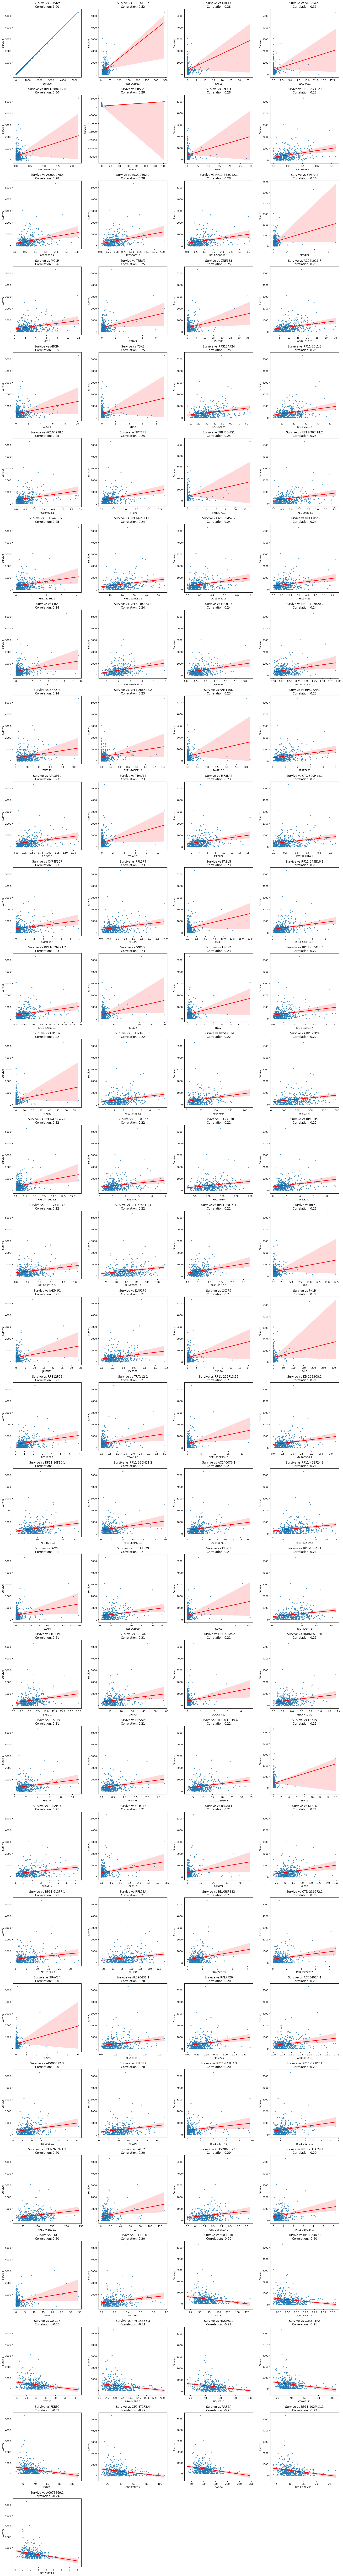

In [ ]:
######################################相関性のグラフ化##########################################

# カラム数
features = data_selected.columns

# 図を4列に並べる設定
n_cols = 4
n_rows = int(np.ceil(len(features) / n_cols))  # 行数を計算

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # 1次元配列に変換

# 各特徴量について散布図を描画
for i, feature in enumerate(features):
    # 回帰直線と相関係数を表示
    sns.regplot(data=data_selected, x=feature, y='Survive', ax=axes[i], scatter_kws={'s':10}, line_kws={'color':'red'})

    # 相関係数の計算
    correlation = data_selected[feature].corr(data_selected['Survive'])

    # タイトルに相関係数を追加
    axes[i].set_title(f'Survive vs {feature}\nCorrelation: {correlation:.2f}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Survive')

# 残った空白のプロットを非表示に
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # レイアウトを自動調整
plt.show()


In [ ]:
###############################学習##############################################

# 説明変数と目的変数の決定
train_features = data.drop('Survive', axis=1).values
train_target = data['Survive'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.3, random_state=0)

# モデルの学習
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# モデルの定義（ハイパーパラメータを手動で設定）
model = lgb.LGBMRegressor(
    n_estimators=100,     # 木の数
    max_depth=5,          # 木の最大深さ
    learning_rate=0.1,    # 学習率
    num_leaves=31,        # 葉の数
    random_state=0
)

# モデルの訓練
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# MSE（平均二乗誤差）の計算
mse = mean_squared_error(y_test, y_pred)
print("テストデータでの平均二乗誤差 (MSE):", mse)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.494454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2099810
[LightGBM] [Info] Number of data points in the train set: 285, number of used features: 22843
[LightGBM] [Info] Start training from score 414.466667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [ ]:
# 説明変数と目的変数の決定
train_features = data_selected.drop('Survive', axis=1).values
train_target = data_selected['Survive'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.3, random_state=0)

# モデルの学習
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# モデルの定義（ハイパーパラメータを手動で設定）
model = lgb.LGBMRegressor(
    n_estimators=100,     # 木の数
    max_depth=5,          # 木の最大深さ
    learning_rate=0.1,    # 学習率
    num_leaves=31,        # 葉の数
    random_state=0
)

# モデルの訓練
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# MSE（平均二乗誤差）の計算
mse = mean_squared_error(y_test, y_pred)
print("テストデータでの平均二乗誤差 (MSE):", mse)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10600
[LightGBM] [Info] Number of data points in the train set: 285, number of used features: 116
[LightGBM] [Info] Start training from score 414.466667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai